In [15]:
from numba import njit
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import solve_ivp # Besserer Integrator
from itertools import product
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.rcParams.update({'font.size': 15})

In [16]:
l = 3
beta0 = 0.5 #days^-1
gamma = 0.1 #days^-1
nu = 1/100 #days^-1
# T = 40
p_base_range = (0.1, 0.3)

p_cap = 1e-3
epsilon = 1e-4
s = 0. # seasonal forcing
omega = 2 * np.pi / 360 #days⁻1

maxVax = 0.01 # Von N0 können pro tag geimpft werden

p_vax = 1000 # Anteil der Leute, die angst haben und sich deswegen Impfen lassen wollen
mu_im = 1/14 #1/days

# p_base = np.linspace(p_base_range[0], p_base_range[1], num=l, endpoint=True)



In [17]:
@njit
def P(H, p_base):
    return p_base + (1-p_base)/p_cap * epsilon * np.log(1+np.exp(1/epsilon * (p_cap - H)))

@njit
def vax(H):
    return (1- np.exp(-p_vax*H))* maxVax

@njit
def kernel(t, T):
    return (2/T)*(2/T)*t*np.exp(-(2/T)*t)

In [18]:
t = np.linspace(0, 200, 1000)
H = np.linspace(0, 0.002, 1000)
H_ticks = np.linspace(0, 0.002, 5)

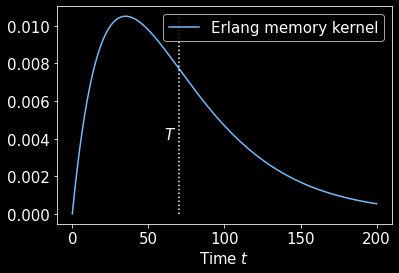

In [19]:
T = 70

fig = plt.figure(figsize=(6, 4))
plt.plot(t, kernel(t, T), color="xkcd:sky blue", label=f'Erlang memory kernel')

plt.vlines(T, 0, np.max(kernel(t, T)), linestyles=':')
plt.text(60, 0.004, f'$T$')

plt.xlabel(f'Time $t$')
plt.legend()

plt.savefig("ErlangKernel.png", bbox_inches='tight', dpi=300)

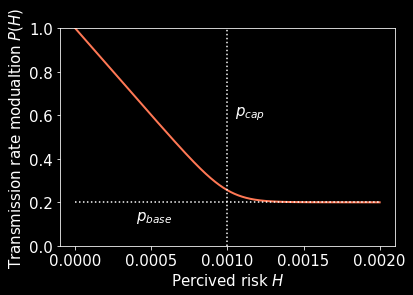

In [20]:
p_base = 0.2

fig = plt.figure(figsize=(6, 4))
plt.plot(H, P(H, p_base), color="xkcd:melon", label=f'Transmission rate modualtion', lw=2) #coral, bright orange
plt.hlines(p_base, 0, H[-1], linestyles=':')
plt.vlines(p_cap, 0, 1, linestyles=':')

plt.text(0.00105, 0.6, f'$p_{{cap}}$')
plt.text(0.0004, 0.12, f'$p_{{base}}$')

plt.xlabel(f'Percived risk $H$')
plt.ylabel(f'Transmission rate modualtion $P(H)$')
# plt.legend()

plt.ylim(0, 1)
plt.xticks(H_ticks)

plt.savefig("softplus.png", bbox_inches='tight', dpi=300)